**Classification with SVM || Dataset: bank**

**Import modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


**Load dataset**

In [ ]:
# Load training data
filename1 = 'bank-additional.csv'
#filename1 = 'bank-additional-full.csv'
bank_df = pd.read_csv(filename1, delimiter=';', header=0)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
bank_df[bank_df.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y



**Data preprocessing**

### Input variables:

Bank client data:

1. age (numeric)
   
2. job: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: "cellular","telephone")

9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:

catCols = [col for col in bank_df.columns if bank_df[col].dtype=="O"]
print(catCols)

lb_make = LabelEncoder()

for item in catCols:
    bank_df[item] = lb_make.fit_transform(bank_df[item])

print(bank_df)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
      age  job  marital  education  default  housing  loan  contact  month  \
0      30    1        1          2        0        2     0        0      6   
1      39    7        2          3        0        0     0        1      6   
2      25    7        1          3        0        2     0        1      4   
3      38    7        1          2        0        1     1        1      4   
4      47    0        1          6        0        2     0        0      7   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
4114   30    0        1          1        0        2     2        0      3   
4115   39    0        1          3        0        2     0        1      3   
4116   27    8        2          3        0        0     0        0      6   
4117   58    0        1          3        0        0     0        0      1   
4118   34    4        2     

In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(bank_df)
bank_df = pd.DataFrame(x_scaled)

In [ ]:
train_df, test_df = train_test_split(bank_df, test_size=0.2)
print(train_df)
print(test_df)

            0         1         2         3    4    5    6    7         8   \
3605  0.200000  0.090909  0.333333  0.285714  0.0  1.0  0.0  1.0  0.444444   
1332  0.414286  0.000000  0.333333  0.857143  0.0  1.0  1.0  0.0  0.333333   
3325  0.128571  0.818182  0.666667  0.285714  0.0  1.0  0.0  0.0  0.000000   
940   0.328571  0.000000  0.333333  0.285714  0.0  1.0  0.0  0.0  0.777778   
604   0.371429  0.090909  0.333333  0.428571  0.0  0.0  0.0  0.0  0.000000   
...        ...       ...       ...       ...  ...  ...  ...  ...       ...   
3974  0.185714  0.818182  0.666667  0.714286  0.0  1.0  0.0  0.0  0.777778   
3198  0.242857  0.000000  0.666667  0.857143  0.0  1.0  0.0  0.0  0.777778   
158   0.414286  0.818182  0.666667  1.000000  0.0  0.0  0.0  0.0  0.333333   
140   0.514286  0.818182  0.000000  0.714286  0.0  1.0  1.0  0.0  0.333333   
3785  0.500000  0.090909  0.333333  0.000000  0.0  1.0  0.0  0.0  0.777778   

        9   ...        11   12        13   14        15        


** Cross validation Using k-fold CV**

K-fold ---------------------------------------------------------------
Model accuracy: 0.9065533980582524


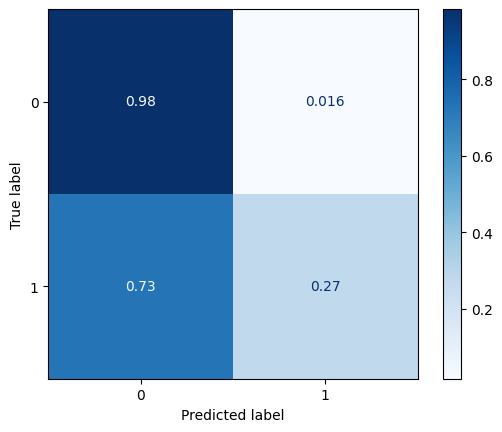

Confusion matrix:
 [[723  12]
 [ 65  24]]
Percentage classification error obtained from validation set: 9.344660194174757%
K-fold ---------------------------------------------------------------
Model accuracy: 0.9053398058252428


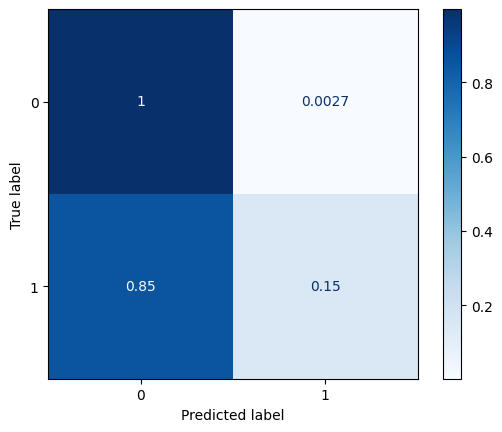

Confusion matrix:
 [[733   2]
 [ 76  13]]
Percentage classification error obtained from validation set: 9.466019417475728%
K-fold ---------------------------------------------------------------
Model accuracy: 0.8956310679611651


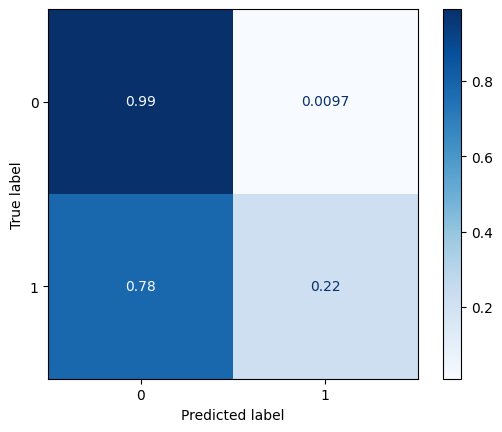

Confusion matrix:
 [[716   7]
 [ 79  22]]
Percentage classification error obtained from validation set: 10.436893203883495%
K-fold ---------------------------------------------------------------
Model accuracy: 0.905224787363305


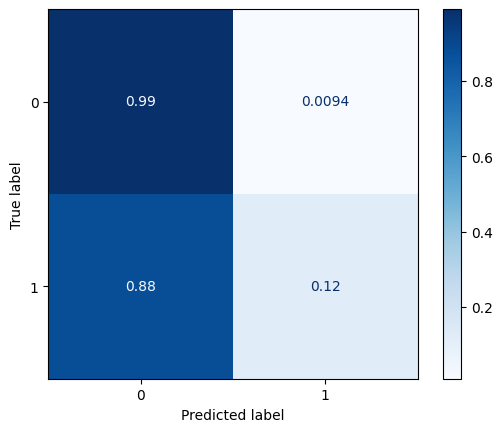

Confusion matrix:
 [[735   7]
 [ 71  10]]
Percentage classification error obtained from validation set: 9.477521263669502%
Mean percentage classification error obtained from cross validation: 9.68127351980087%


In [ ]:
X_train = train_df.iloc[:,0:20].to_numpy()
y_train = train_df.iloc[:,20].astype(int).to_numpy()

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('K-fold ---------------------------------------------------------------')

    # Create the SVM estimator
    clf = SVC(kernel='rbf', random_state=0)

    # Train the model using the training set
    clf.fit(X_train[train], y_train[train])

    # Generate predictions
    y_pred = clf.predict(X_train[validation])

    # Evaluate by means of accuracy
    accuracy = accuracy_score(y_train[validation], y_pred)
    print(f'Model accuracy: {accuracy}')

    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                   labels=clf.classes_,
                                                   display_labels=clf.classes_,
                                                   cmap=plt.cm.Blues,
                                                   normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')

    cv_percentage_classification_errors.append(percentage_classification_error)

# Calculate the mean percentage classification error obtained from cross-validation
print(f'Mean percentage classification error obtained from cross validation: {np.mean(cv_percentage_classification_errors)}%')


 **Training**

In [ ]:
# Create the SVM estimator
clf = SVC(kernel='rbf', random_state=0)
print('Names and current values for all parameters for the estimator: ', clf.get_params())

# Train the model using 'all' the training set
clf.fit(X_train, y_train)

Names and current values for all parameters for the estimator:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC(random_state=0)


**Test**

Model accuracy: 0.9029126213592233


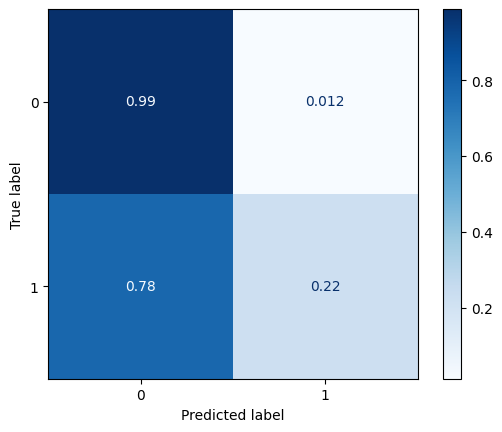

Confusion matrix:
 [[724   9]
 [ 71  20]]
Percentage classification error obtained from test set: 9.70873786407767%


In [ ]:
X_test = test_df.iloc[:,0:20].to_numpy()
y_test = test_df.iloc[:,20].astype(int).to_numpy()

# Generate predictions
y_pred = clf.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                               labels=clf.classes_,
                                               display_labels=clf.classes_,
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

* Model Accuracy: 90.29%
Accuracy is a measure of the overall correctness of the model's predictions. In this case, the model correctly predicts the class of instances approximately 90.29% of the time.

* Confusion matrix

True Positives (TP): 20 instances were correctly classified as positive.

False Positives (FP): 9 instances were incorrectly classified as positive.

True Negatives (TN): 724 instances were correctly classified as negative.

False Negatives (FN): 71 instances were incorrectly classified as negative.

* Percentage Classification Error:

Percentage Classification Error: 9.71%
The model has a high accuracy of 90.29%, and the confusion matrix provides a detailed breakdown of true positives, false positives, true negatives, and false negatives. The low percentage classification error indicates that the model performs well on the test set, with only around 9.71% misclassified instances.

In [ ]:
bank_svm_results = { 'real_value': y_test,
                    'prediction': y_pred}

df = pd.DataFrame(bank_svm_results)

df.to_csv('bank_svm_results.csv')